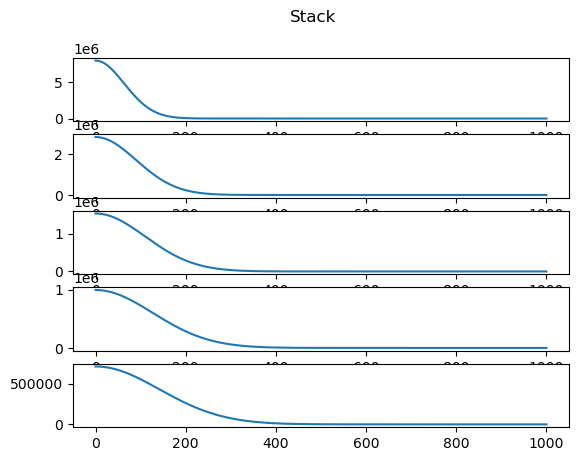

In [2]:
import pandas as pd
import numpy as np

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

from astropy import units as u
from astropy import coordinates as coord
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.utils.data import get_pkg_data_filename

from urllib.request import urlretrieve


# Define distribution function for constant E. The general 
# modeling space is around 100-200 parsecs. E is constant in 
# this function, resulting in D being constant.

# R = np.linspace(0, 100, 1000);
# t = np.linspace(0, 100, 100);

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system


# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

def distribution(E, R, t, D):
    delta = 0.45;
    Tpp = 6*(10**7)
    Rdif = 2 * np.sqrt(D * t)

    N = 1
    alpha = 2.7

    dist = N*(E**-alpha)/((np.pi**(3/2))*(Rdif**3))*np.exp(-(R**2)/(Rdif**2))

    return dist

dc = 0.5;


rad = float(input("At what radius in parsecs? ").strip())
en = float(input("At what energy ? ").strip())
if(en == 0):
    en = 100000

fig, axs = plt.subplots(5)
fig.suptitle("Plot against radius")

for i in range (5):
    t = 20*(i + 1)
    R1 = np.linspace(0, 500, 1000)
    axs[i].plot(R1, distribution(en, R1, t, dc))


E1 = np.linspace(10000, 1000000000000, 100000)

fig, axs = plt.subplots(5)
fig.suptitle("Plot against energy")

for i in range (5):
    t = 20*(i + 1)
    axs[i].plot(E1, distribution(E1, rad, t, dc))


t1 = np.linspace(0, 100, 100);

plt.plot(t1, distribution(en, rad, t1, dc))